<h1> Q. Train a classification deep learning model using the training data and submit your predictions for the testX file . </h1>

In [173]:
# importing required libraries

In [174]:
import numpy as np 
import pandas as pd

In [175]:
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
import pickle
from keras import optimizers
from keras.utils import to_categorical


<h2>1. Reading the pickle files </h2>

In [176]:
with open("trainX.pickle","rb") as pickle_in:
    X = pickle.load(pickle_in)
    
with open("trainY.pickle","rb") as pickle_in:
    y = pickle.load(pickle_in)    
    

In [177]:
print(X.shape)
print(y.shape)

(60000, 28, 28)
(60000,)


<h2> 2. Splitting the data into 3:1 (train data and test data) </h2>

In [178]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13,test_size=0.25)


In [179]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(45000, 28, 28)
(45000,)
(15000, 28, 28)
(15000,)


<h2> 3. Reshaping the size of data, because we can't fit 3d data into model,so need to convert into 2d </h2>

In [180]:
img_rows, img_cols = 28, 28

X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
input_shape

(28, 28, 1)

In [181]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255
X_test/=255

In [182]:
print(X_train.shape)
print("Train samples: ",X_train.shape[0])
print("Test samples: ",X_test.shape[0])


(45000, 28, 28, 1)
Train samples:  45000
Test samples:  15000


In [183]:
batch_size = 256
num_classes = 10
epochs = 50

In [184]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

X_train=np.reshape(X_train,(45000,784))
X_test=np.reshape(X_test,(15000,784))

<h2> 4. Building the Sequential model  and adding Convolutional Layers </h2>

In [185]:
model = Sequential()

#Layer-1 Input Layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

#Layer-2 Hidden Layer1
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#Layer-3 Hidden Layer2
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

#Layer-3 Ouptput Layer
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [186]:
X_train = X_train.reshape(-1,28, 28, 1)   #Reshape for CNN (requires 4 parameters)
X_test = X_test.reshape(-1,28, 28, 1)


<h2> 5. Fitting the data into Model </h2>

In [187]:
# Fit() returns a history object which we can use to plot the graphs for the validation accuracy and validation loss 

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
#print(score)

Train on 45000 samples, validate on 15000 samples
Epoch 1/50
45000/45000 [==============================] - 137s 3ms/step - loss: 0.8174 - acc: 0.6945 - val_loss: 0.4985 - val_acc: 0.8226
Epoch 2/50
45000/45000 [==============================] - 129s 3ms/step - loss: 0.5069 - acc: 0.8129 - val_loss: 0.3922 - val_acc: 0.8600
Epoch 3/50
45000/45000 [==============================] - 130s 3ms/step - loss: 0.4316 - acc: 0.8410 - val_loss: 0.3680 - val_acc: 0.8676
Epoch 4/50
45000/45000 [==============================] - 125s 3ms/step - loss: 0.3906 - acc: 0.8554 - val_loss: 0.3280 - val_acc: 0.8817
Epoch 5/50
45000/45000 [==============================] - 121s 3ms/step - loss: 0.3590 - acc: 0.8701 - val_loss: 0.3110 - val_acc: 0.8889
Epoch 6/50
45000/45000 [==============================] - 138s 3ms/step - loss: 0.3406 - acc: 0.8755 - val_loss: 0.2874 - val_acc: 0.8962
Epoch 7/50
45000/45000 [==============================] - 136s 3ms/step - loss: 0.3260 - acc: 0.8820 - val_loss: 0.2828 - 

<h2> 6. Showing the accuracy of the model </h2> 

In [192]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.21338630822698276
Test accuracy: 0.9253333333333333


<h1> 7. Loading the testing pickle file </h1>

In [223]:
with open("testX.pickle","rb") as pickle_in:
    test_X = pickle.load(pickle_in)
test_X.shape

(10000, 28, 28)

In [224]:
test_X=test_X.reshape(test_X.shape[0],img_rows,img_cols,1)

test_X = test_X.astype('float32')
test_X /= 255
test_X.shape

(10000, 28, 28, 1)

<h2>8. Predicting the classes(0-10) for the testX dataset </h2>

In [225]:
y_pred_class = model.predict_classes(test_X)
y_pred_class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

<h2> 9. Showing the testX images with their corresponding predicted classes </h2>


Image at 0th index
Predicted class :  9


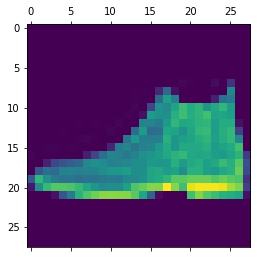


Image at 1th index
Predicted class :  2


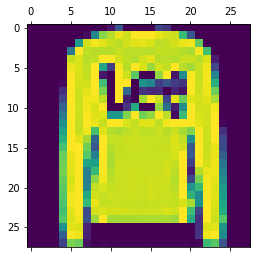


Image at 2th index
Predicted class :  1


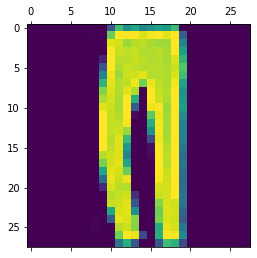


Image at 3th index
Predicted class :  1


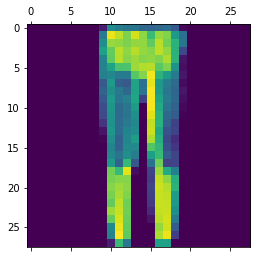


Image at 4th index
Predicted class :  6


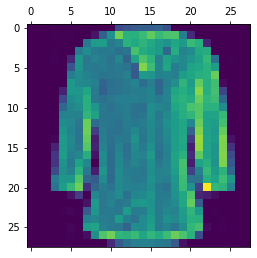

In [227]:
for i in range(0,5):
    print("\nImage at {}th index".format(i))
    plt.matshow(test_X[i].reshape(28,28))
    print("Predicted class : ",y_pred_class[i])
    plt.show()
   

<h2> 10. Writting the class values to the file </h2>

In [228]:
with open('Reena_testY_pred_class.pickle', 'wb') as pickle_out:
    pickle.dump(y_pred_class,pickle_out)

<h2> 11. Plotting Training and validation Accuracy </h2>

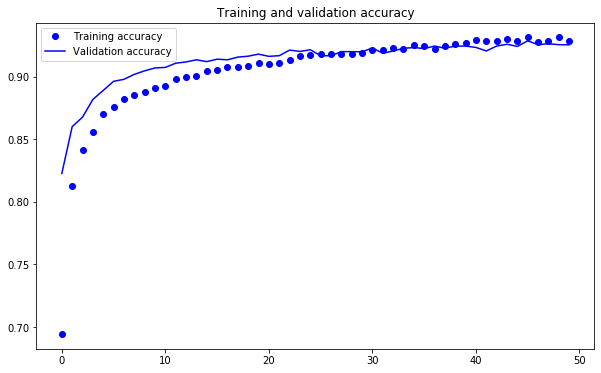

In [229]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(10,6))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

<h2> 12. Plotting Training and validation Loss </h2>

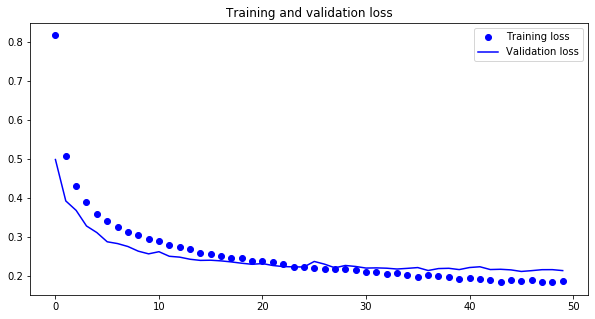

In [231]:
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()